### 분리집합(Distjoint Set)
- 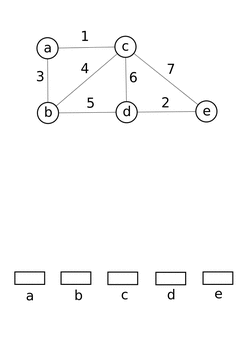
- 서로소 집합이라고도 불리며, 공통 원소가 없는 두 집합을 의미한다.
- union과 find 2개의 연산으로 조작할 수 있다.
  - union: 2개의 원소가 포함된 집합을 하나의 집합으로 합치는 연산
  - find: 특정 원소가 속한 집합이 어떤 집합인지 알려주는 연산 
- 두가지 연산은 거의 $O(1)$에 가능하다.
  - 기술적으로는 아커만함수 $O(\alpha(N))$이지만, $\alpha(N)$은 아주 느리게 증가하기 때문에 $O(1)$로 간주한다.
- 구현상, 각 원소가 어느 집합에 속해 있는지를 저장하는 배열을 이용하여 집합을 표현한다.

### 경로 압축(Path Compression)
- 만약 입력이 linked list/치우쳐진 트리와 같은 형태로 주어진다면, find 연산은 $O(N)$이 걸리게 될 것이다. 이를 해결하기 위해 경로 압축을 사용한다.
- find 연산을 실행한 뒤에, 해당 노드가 속한 집합의 루트 노드를 부모 노드로 바로 갱신한다.

### Union by Rank/Size 
- union 연산을 실행할 때, 두 집합의 크기를 비교하여 더 작은 쪽을 큰 쪽에 붙이는 방식이다.
- 이를 통해 find 연산의 시간 복잡도를 $O(\log N)$으로 줄일 수 있다.

### 사이클 판별
- union-find 알고리즘은 그래프 내에서의 사이클을 판별할 때 사용할 수 있다.
- 간선을 하나씩 확인하며, 간선의 두 노드가 서로 같은 집합에 속하는지 확인한다.
  - 서로 다른 집합에 속한다면, 두 노드를 union 연산을 실행한다.
  - 서로 같은 집합에 속한다면, 사이클이 발생한 것이다.

### 유니온 파인드

In [ ]:
class UF:
  def __init__(self, n):
    self.p = list(range(n))

  def find(self, a):
    a_ = a
    while a != self.p[a]:
      a = self.p[a]
    while a_ != a:
      self.p[a_], a_ = a, self.p[a_]
    return a

  def merge(self, a, b):
    self.p[self.find(b)] = self.find(a)

### 분리집합 유니온

In [ ]:
class DSU:
  def __init__(self, n):
    self.P = list(range(n))
    self.s = [1] * n
    # self.ns = n

  def find(self, a):
    _a = a
    while a != self.P[a]:
      a = self.P[a]
    while _a != a:
      self.P[_a], _a = a, self.P[_a]
    return a

  def union(self, a, b):
    a, b = self.find(a), self.find(b)
    if a != b:
      if self.s[a] < self.s[b]:
        a, b = b, a

      # self.ns -= 1
      self.P[b] = a
      self.s[a] += self.s[b]

In [ ]:
class DisjointSetUnion:
  def __init__(self, n):
    self.parent = list(range(n))
    self.size = [1] * n
    self.num_sets = n

  def find(self, a):
    acopy = a
    while a != self.parent[a]: 
      a = self.parent[a]
    while acopy != a: # path compression
      self.parent[acopy], acopy = a, self.parent[acopy]
    return a

  def union(self, a, b):
    a, b = self.find(a), self.find(b)
    if a != b: # 
      if self.size[a] < self.size[b]: # union-by-size
        a, b = b, a

      self.num_sets -= 1 
      self.parent[b] = a 
      self.size[a] += self.size[b] # union-by-size